# 1. 문제정의

## 1.1 경진대회 소개

🏠 유형별 임대주택 설계 시 단지 내 적정 🅿️ 주차 수요를 예측

주요사항 -> 문제 유형 Classification(분류)


### 평가
- 평가척도 : MAE(Mean Absolute Error)
- Public 평가 : 전체 Test 데이터 중 무작위 33% (50단지)
- Private 평가 : 전체 Test 데이터 중 나머지 67% (100단지)

### 배경
- 아파트 단지 내 필요한 주차대수는 ①법정주차대수 ②장래주차수요 중 큰 값에 따라 결정하게되어 있어, 정확한 ②장래주차수요의 산정을 필요로 합니다.
- 현재 ②장래주차수요는 ‘주차원단위’와 ‘건축연면적’을 기초로하여 산출되고 있으며, ‘주차원단위’는 신규 건축예정 부지 인근의 유사 단지를 피크 시간대 방문하여 주차된 차량대수를 세는 방법으로 조사하고 있습니다.
- 이 경우 인력조사로 인한 오차발생, 현장조사 시점과 실제 건축시점과의 시간차 등의 문제로 과대 또는 과소 산정의 가능성을 배제할 수 없습니다.

### 데이터 분석 대상
- train : 총 2952행의 데이터 15열
- test : 총 1022행의 데이터 14열("등록차량수" 제외)
- age_gender : 총 16개 행("지역" : {'경상북도', '경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도','부산광역시', '제주특별자치도', '울산광역시', '충청북도', '전라남도', '대구광역시', '서울특별시','세종특별자치시'}) 의 데이터 23열

=> train 데이터를 이용해 모델을 학습 시킨 뒤 test 데이터를 활용해 **"등록차량수"** 예측

=> ***???age_gender를 어떻게 결합시킬까???***

## 1.2 평가척도
=> 참가자가 최종적으로 제출한 결과물의 우열을 판단하는 척도

- 본 대회에서는 MAE라는 평가척도를 적용합니다. 이는 MAE에서 A는 absolute, 그러니까 오차의 제곱이 아닌 절대값을 구하는 겁니다. 이 셋은 r2와 같은 상관성 개념이 아니라 거리 개념이라, 0이 제일 정확하고, 값이 커질수록 부정확합니다

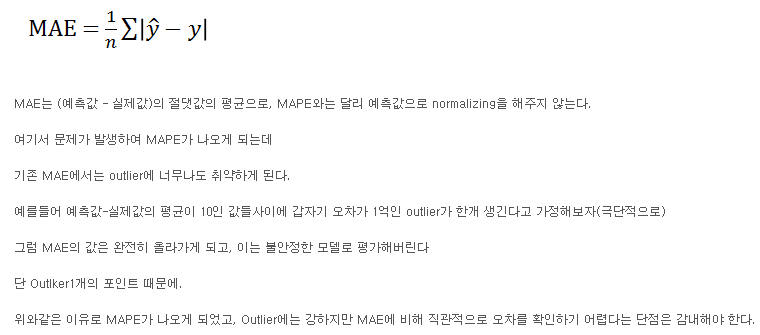
(출처:https://blog.naver.com/limitsinx/221578145366)

=> ***//골고루 좋은 예측을 해야한다//***

=> ***???예측값이 있으면 실제 값이 있어야하는데???*** : 실제값은.... 단지내주차면수????

## 1.3 도메인 조사

### 용어 : 설명

- 단지코드(0) : 단지 고유번호 =>
- 총 세대수(1) : 단지별 "전용면적별세대수(6)"의 합
- 임대건물구분(2) : 단지 내에 있는 임대 건물 => 아파트, 상가 2개로 나누어 진다.
- 지역(3) : 단지가 위치하고 있는 지역
- 공급유형(4) : {'공공임대(10년)', '공공임대(50년)', '공공임대(분납)', '국민임대', '영구임대', '임대상가', '행복주택', '공공분양', '공공임대(5년)', '장기전세'}
- 전용면적(5) : 단지내 아파트의 면적 타입 ex)A타입, B타입
- 전용면적별세대수(6) : 전용면적별세대수
- 공가수(7) : 공가수는 데이터 측정 당시 비어있는 집을 의미
- 자격유형(8) : 임대 자격 ex)무주택, 저소득층, 대학생
- 임대보증금(9) :
- 임대료(10)
- 도보 10분거리 지하철(11) : 지하철 수 (***????환승노선수반영?????***...?? => ex)충무로역은 3호선, 4호선이면 2개?)
-  ''             버스(12) : 버스정류장 수
- 단지내주차면수(13) : 단지내에 주차를 할 수 있는 면수
- 등록차량수(14) : 등록되어있는 차량의 수 **얘가 target변수**

(사진)


## 1.4 문제 해결을 위한 접근 방식 소개

데이터 셋에서 불필요한 데이터는 과감하게 삭제해야 한다. => 이를 위해 1.2절에서는 탐색적 데이터 분석을 진행한다. 
그 후 1.3절에서는 데이터 전처리를 진행하고 1.4 절에서는 모델링 작업을 진행…. 모델링이란 -> 머신러닝 알고리즘을 이용해 학습 및 예측을 진행하는 과정을 의미…. 1.5절에서는 추가적인 성능 향상을 위한 방법을 소개…
즉, **데이터 탐색 -> 데이터 전처리 -> 모델링 -> 모델링 평가 및 성능 개선 순으로 이루어진다..**


## 1.5 분석환경 구축

분석에 필요한 library들을 다운… 이번 분석에서는 numpy, pandas, seaborn, sklearn, xgboost 등을 사용

# 2. 탐색적 데이터 분석

정확한 데이터 분석을 위해서는 데이터에 대한 이해가 반드시 선행돼야 한다…… 전반적으로 데이터를 이해하기 위한 데이터 탐색 과정을 탐색적 데이터 분석이라고 합니다.

시각화 설정 및 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#출력 그림 크기 조절
sns.set(rc={'figure.figsize':(12,12)})
plt.style.use('ggplot')
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")

## 2.1 학습 데이터

우선 데이터가 가진 정보 파악

### 2.1.1 기초 정보 파악

In [2]:
# 데이터 로드
train = pd.read_csv('data/train.csv')
# 데이터 정보 출력
print(train.info())
# 데이터 예시 출력
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


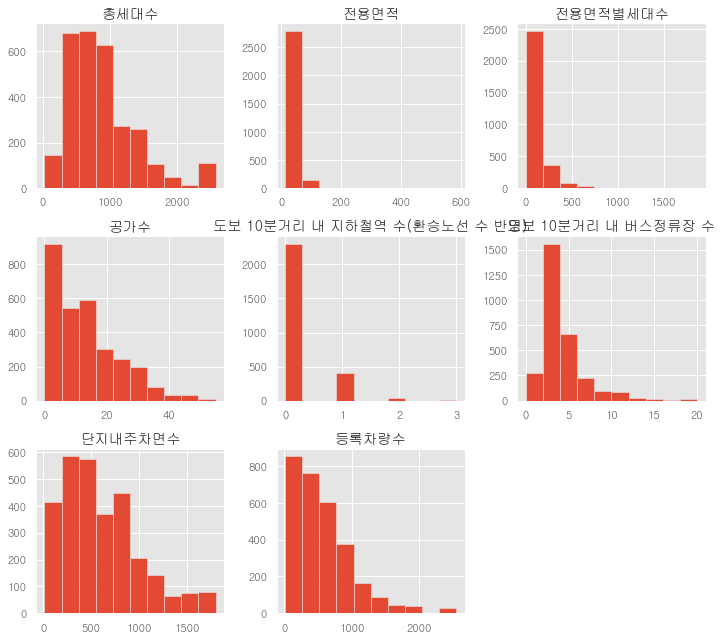

In [3]:
# 학습 데이터 시각화
train.hist(figsize = (10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

In [4]:
# 추가적인 결측치 개수 파악
pd.DataFrame(train.isna().sum()).T

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,0,0,0,0,0,0,0,0,0,569,569,211,4,0,0


Q1. **결측치** : 임대보증금(9), 임대료(10), 지하철(11), 버스정류장(12) 4개의 열에서 결측치 발견...

=> **임대보증금, 임대료 부분,,,** 모두 행복주택, 공공분양, 자격유형은 모두 D 조건 및 특징 확인 후 전처리 결측치 처리,,,

=> 지하철, 버스정류장,,, ***???결측치 처리,,,,어떻게,,, 고민해보자,,,???***

Q2. **타입변환** : 임대보증금(9), 임대료(10), 지하철(11), 버스정류장(12) 4개의 열 변환 가능

=> 임대보증금, 임대료 : object => **int**, float 형 변환
=> 지하철, 버스정류장 : float => object 형 변환

Q3. **열이름 변환** : 지하철(11),버스정류장(12) 열이름 변환 가능

In [5]:
# 중복데이터 확인
sum(train.duplicated())

320

In [6]:
# 중복데이터 더블체크
train[train.duplicated()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
21,C1407,1216,아파트,대전광역시,국민임대,41.58,70,13.0,A,27637000,164610,1.0,1.0,1285.0,1064.0
23,C1407,1216,아파트,대전광역시,국민임대,46.36,170,13.0,A,36048000,198250,1.0,1.0,1285.0,1064.0
25,C1407,1216,아파트,대전광역시,국민임대,51.24,62,13.0,A,42056000,253520,1.0,1.0,1285.0,1064.0
27,C1945,755,아파트,경기도,국민임대,39.72,120,6.0,B,15607000,130070,1.0,3.0,734.0,730.0
49,C1244,1722,아파트,경기도,국민임대,46.81,76,10.0,A,43990000,304540,0.0,10.0,1483.0,1804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,C1803,100,아파트,울산광역시,행복주택,26.26,6,13.0,J,34400000,163680,0.0,2.0,57.0,78.0
2747,C1803,100,아파트,울산광역시,행복주택,36.16,8,13.0,J,46400000,220780,0.0,2.0,57.0,78.0
2749,C1803,100,아파트,울산광역시,행복주택,36.16,9,13.0,J,46400000,220780,0.0,2.0,57.0,78.0
2796,C2362,1509,아파트,경기도,행복주택,21.96,144,46.0,J,19760000,83000,0.0,2.0,1055.0,196.0


- 중복이 아닌데... 왜 중복으로 나타날까... => 코드 추가적인 확인 필요

In [7]:
# 학습 데이터 기초 통계량 확인
display(train.describe().T)

,count,mean,std,min,25%,50%,75%,max
총세대수,2952.0,886.661247,513.540168,26.00,513.50,779.00,1106.0000,2568.0
전용면적,2952.0,44.757215,31.874280,12.62,32.10,39.93,51.5625,583.4
전용면적별세대수,2952.0,102.747967,132.640159,1.00,14.00,60.00,144.0000,1865.0
공가수,2952.0,12.921070,10.778831,0.00,4.00,11.00,20.0000,55.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),2741.0,0.176578,0.427408,0.00,0.00,0.00,0.0000,3.0
도보 10분거리 내 버스정류장 수,2948.0,3.695726,2.644665,0.00,2.00,3.00,4.0000,20.0
단지내주차면수,2952.0,601.668360,396.407072,13.00,279.25,517.00,823.0000,1798.0
등록차량수,2952.0,559.768293,433.375027,13.00,220.00,487.00,770.0000,2550.0


**Q4. 상관관계** : IQR를 확인 했을 때 "단지내주차면수(13)"와 "등록차량수(14)"의 양의 상관관계 일수도? => 확인 필요

**Q5. 이상치** : 버스정류장수 20개가 넘는데...? 이상치일수도..?? => 확인 필요,
 => 음수 값은 발견되지 않았다.

In [8]:
# 임대료, 임대보증금 열 특이값 확인
display(train[train["임대료"] == "-"])
display(train[train["임대보증금"] == "-"])

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2043,C1397,370,아파트,서울특별시,장기전세,23.32,51,9.0,A,87444000,-,0.0,3.0,1590.0,1595.0
2044,C1397,370,아파트,서울특별시,장기전세,46.79,4,9.0,A,174888000,-,0.0,3.0,1590.0,1595.0
2045,C1397,370,아파트,서울특별시,장기전세,46.91,69,9.0,A,174888000,-,0.0,3.0,1590.0,1595.0
2046,C1397,370,아파트,서울특별시,장기전세,51.96,24,9.0,A,194562000,-,0.0,3.0,1590.0,1595.0
2047,C1397,370,아파트,서울특별시,장기전세,51.99,80,9.0,A,194562000,-,0.0,3.0,1590.0,1595.0
2048,C1397,370,아파트,서울특별시,장기전세,59.93,142,9.0,A,216423000,-,0.0,3.0,1590.0,1595.0
2100,C1039,790,아파트,서울특별시,장기전세,51.32,126,13.0,A,187694000,-,0.0,3.0,673.0,645.0
2101,C1039,790,아파트,서울특별시,장기전세,59.88,49,13.0,A,213863000,-,0.0,3.0,673.0,645.0
2102,C1039,790,아파트,서울특별시,장기전세,59.94,75,13.0,A,213863000,-,0.0,3.0,673.0,645.0
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2550,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2551,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,-,-,0.0,3.0,338.0,345.0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,-,-,0.0,3.0,338.0,345.0
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,-,-,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,-,-,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,-,-,0.0,8.0,664.0,744.0


**Q6 . 특이값** : 임대보증금(9), 임대료(10) 열에 특이값 존재 확인

=> 모두 '국민임대', '행복주택' => 확인 필요 

=> 클렌징 파트에서 변화

In [9]:
# 전용면적 단위 변환 필요?
train["전용면적"].unique()

array([ 39.72,  51.93,  51.95,  59.88,  33.48,  39.6 ,  46.9 ,  51.97,
        30.95,  30.99,  41.11,  41.39,  41.58,  46.36,  51.24,  36.55,
        36.62,  39.62,  46.73,  46.81,  46.95,  51.78,  33.38,  39.46,
        46.66,  46.87,  46.88,  51.96,  39.63,  46.96,  59.89,  51.88,
        51.49,  59.64,  37.67,  42.9 ,  49.44,  26.37,  31.32,  32.1 ,
        72.16,  39.98,  41.55,  12.62,  17.4 ,  22.89,  23.13,  23.25,
        27.75,  28.19,  34.8 ,  42.35,  42.4 ,  49.37,  55.17,  55.5 ,
        36.44,  45.09,  45.32,  26.34,  30.48,  19.69,  27.12,  32.54,
        36.43,  46.89,  49.99,  51.14, 317.17,  36.02,  36.38,  45.88,
        39.99,  49.95,  51.51,  51.59,  51.9 ,  59.91,  59.94,  59.99,
        52.74,  31.84,  63.68, 137.49,  39.69,  51.86,  51.91,  59.57,
        40.32,  38.  ,  37.26,  37.41,  37.49,  37.95,  38.04,  39.33,
        54.51,  54.61,  54.91,  75.98, 109.11, 583.4 ,  39.3 , 126.65,
        19.  ,  14.1 ,  19.31,  21.19,  22.95,  23.4 ,  27.23,  31.85,
      

**Q7 . 단위변환** : 전용면적(5) 단위 변환 필요?  ==> 확인 필요

### 2.1.2 연속형 변수

-총세대수(1), 전용면적(5), 전용면적별세대수(6), 공가수(7), 임대보증금(9), 임대료(10), 지하철역수(11), 버스정류장수(12), 단지내주차면수(13), 등록차량수(TARGET)

- 설명변수 14개 중 `9개`

- 반응변수 `1개`

In [10]:
# 수치형 타입의 변수 저장
numerics = [
    'int16','int32','int64','float16','float32','float64'
]
num_cols = train.select_dtypes(include = numerics).columns

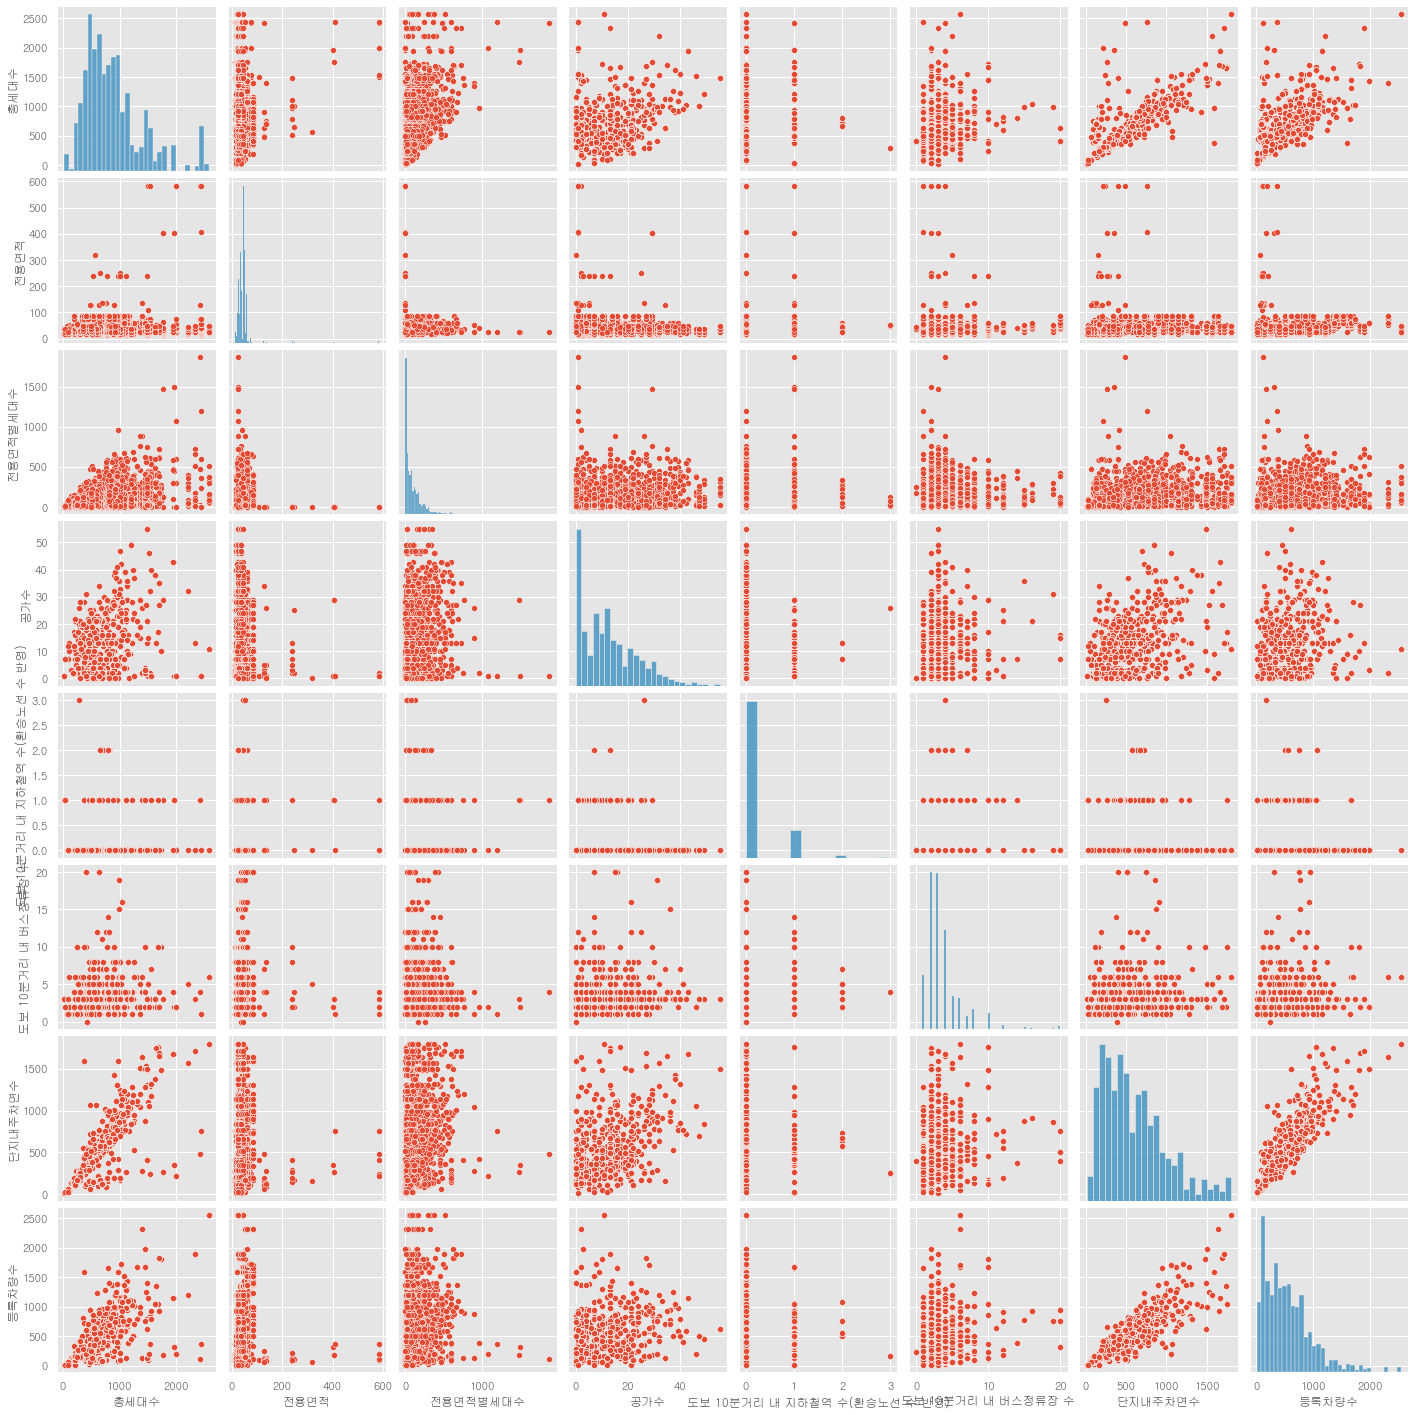

In [11]:
# 상관성 시각화
sns.pairplot(data = train)
plt.show()

,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
총세대수,1.000000,0.042271,0.098205,0.068192,0.213843,-0.001446,0.501488,0.316703
전용면적,0.042271,1.000000,-0.035479,-0.089201,-0.013111,-0.007866,0.071260,0.115453
전용면적별세대수,0.098205,-0.035479,1.000000,0.166472,-0.056680,0.047112,0.281989,0.247085
공가수,0.068192,-0.089201,0.166472,1.000000,-0.093334,0.043285,0.289819,0.118121
도보 10분거리 내 지하철역 수(환승노선 수 반영),0.213843,-0.013111,-0.056680,-0.093334,1.000000,0.098380,-0.055544,-0.108592
도보 10분거리 내 버스정류장 수,-0.001446,-0.007866,0.047112,0.043285,0.098380,1.000000,0.070696,0.103752
단지내주차면수,0.501488,0.071260,0.281989,0.289819,-0.055544,0.070696,1.000000,0.859216
등록차량수,0.316703,0.115453,0.247085,0.118121,-0.108592,0.103752,0.859216,1.000000


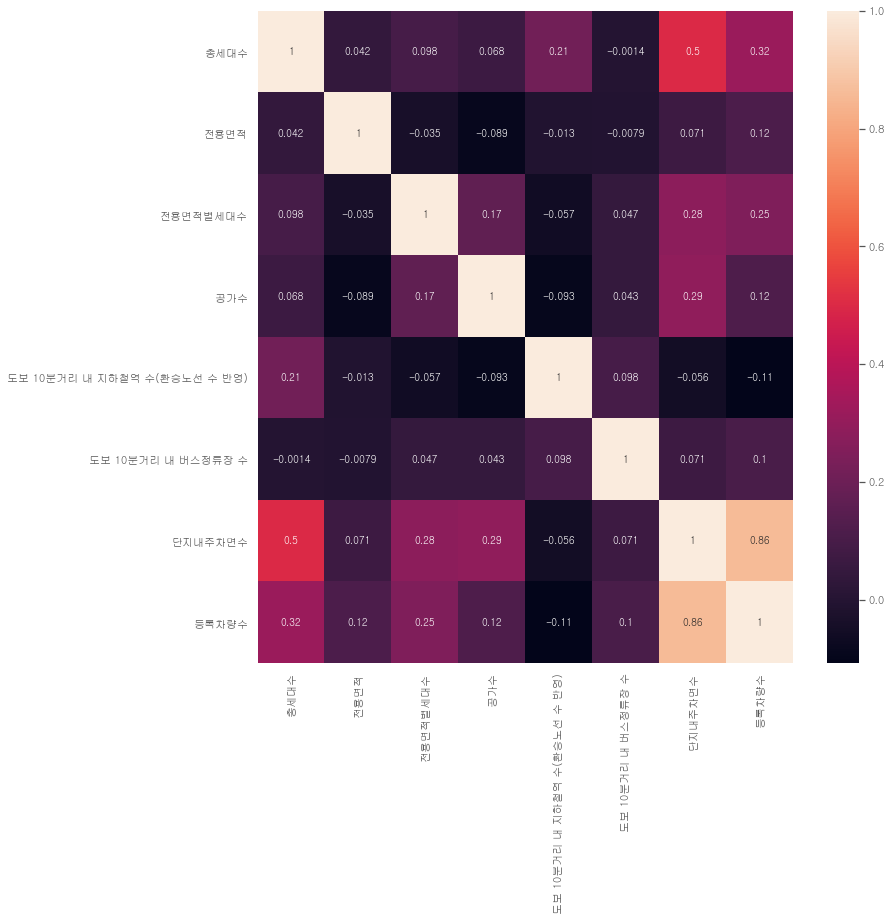

In [12]:
# 반응변수와의 상관성
display(train.corr())

#시각화
sns.heatmap(train.corr(), annot=True)
plt.show()

**Q8 . 상관성** : 
- 총세대수(1) - 등록차량수(14), 총세대수(1) - 단지내주차면수(13), 단지내주차면수(13) - 등록차량수(14) 에서 상관관계확인 
- **단지내주차면수**와 등록차량수 매우 유의한 상관관계 **중요변수 예상**
- 임대료와 임대보증금은 원래 jptnb에서도 NA떠야 함.  IMPUTATION한다면 상식적으로 **높은 상관관계 예상**
- 예상과는 다르게 **"전용면적별세대수"**와는 크게 상관이없다.

### 분포

<AxesSubplot:>

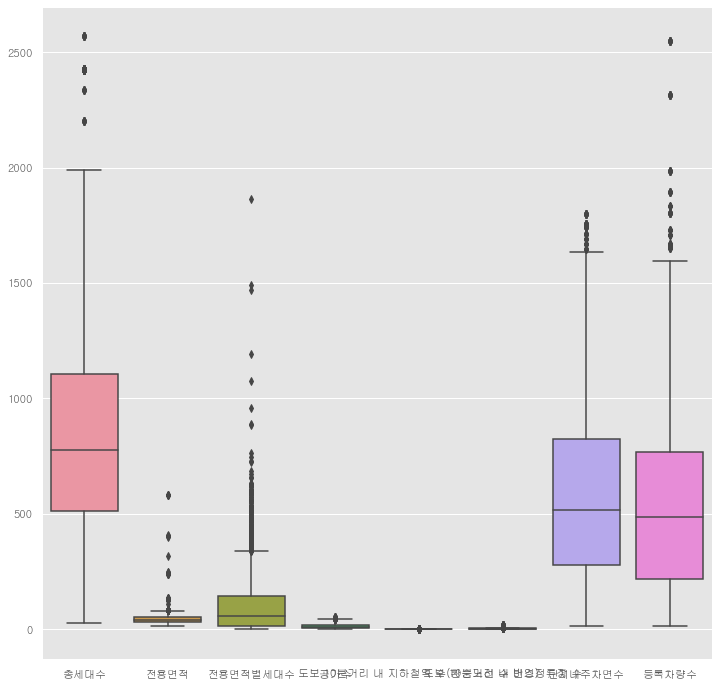

In [13]:
sns.boxplot(data = train)

<AxesSubplot:>

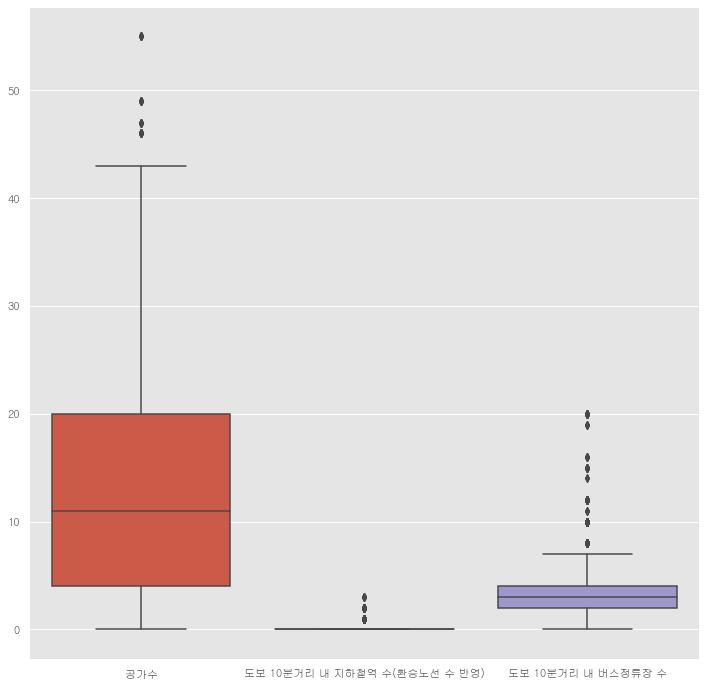

In [14]:
sns.boxplot(data = train.iloc[:,7:13])

- "버스정류장"과 "전용면적", "전용면적별세대수" 변수에 이상치가 있을 가능성 => ***확인필요***

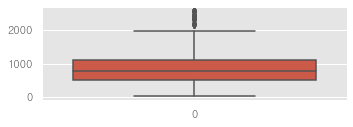

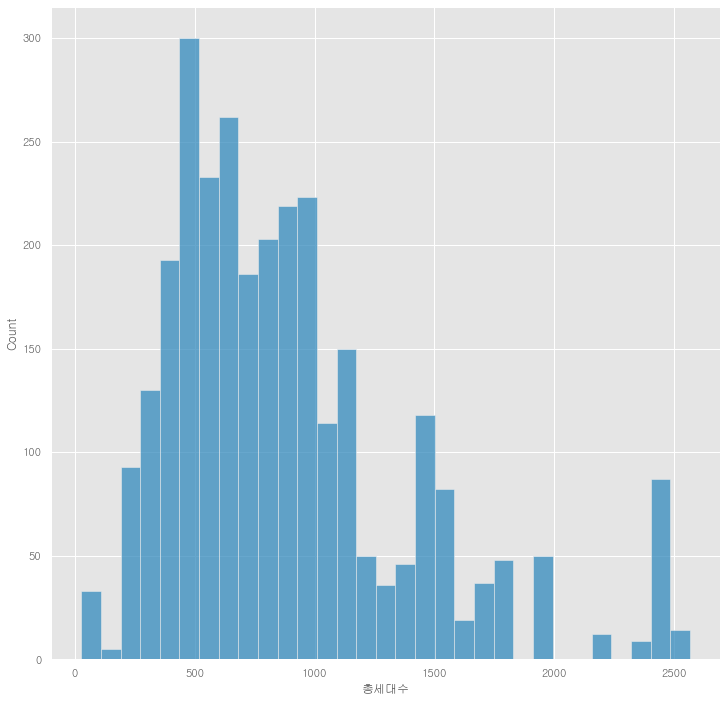

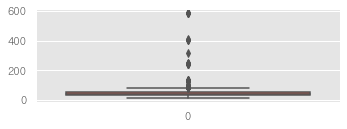

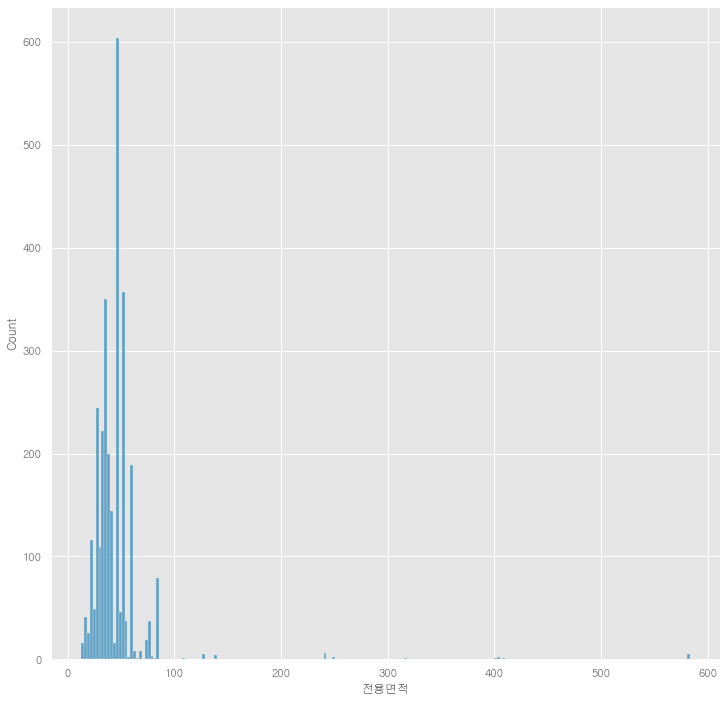

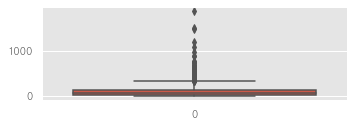

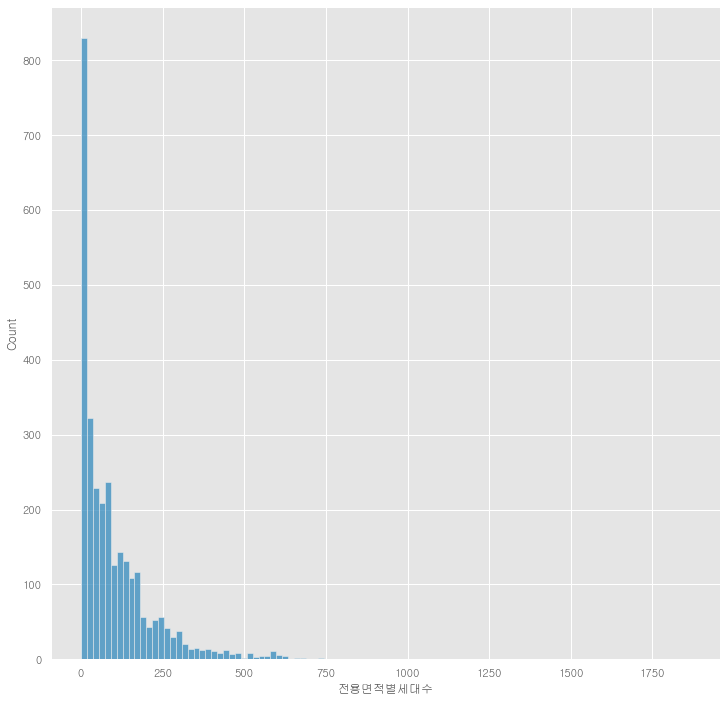

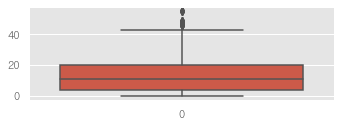

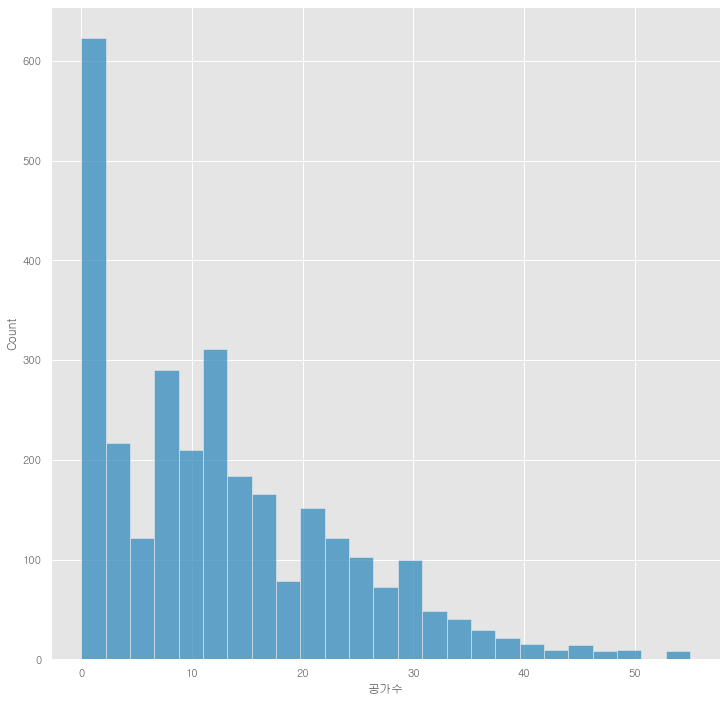

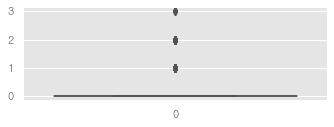

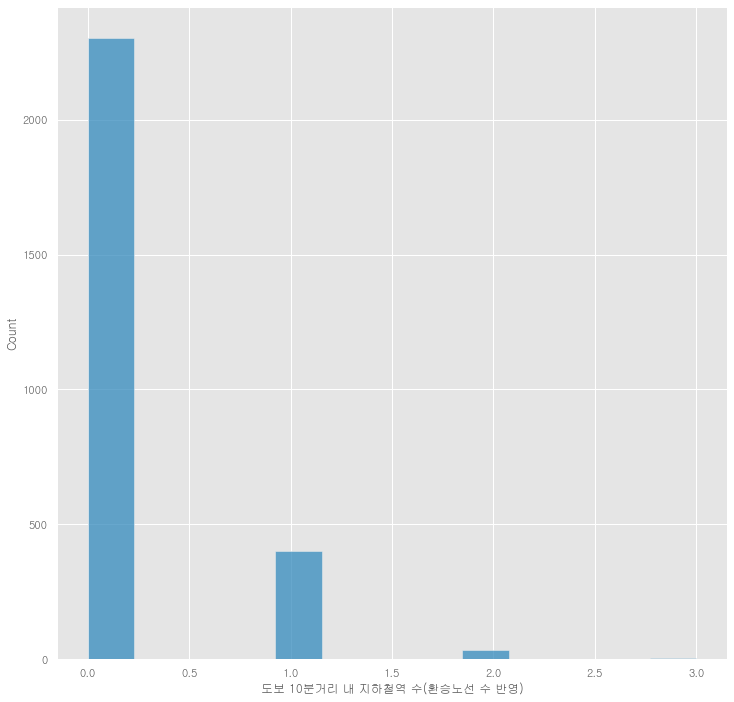

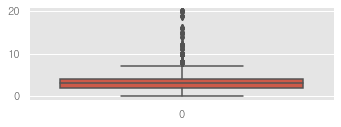

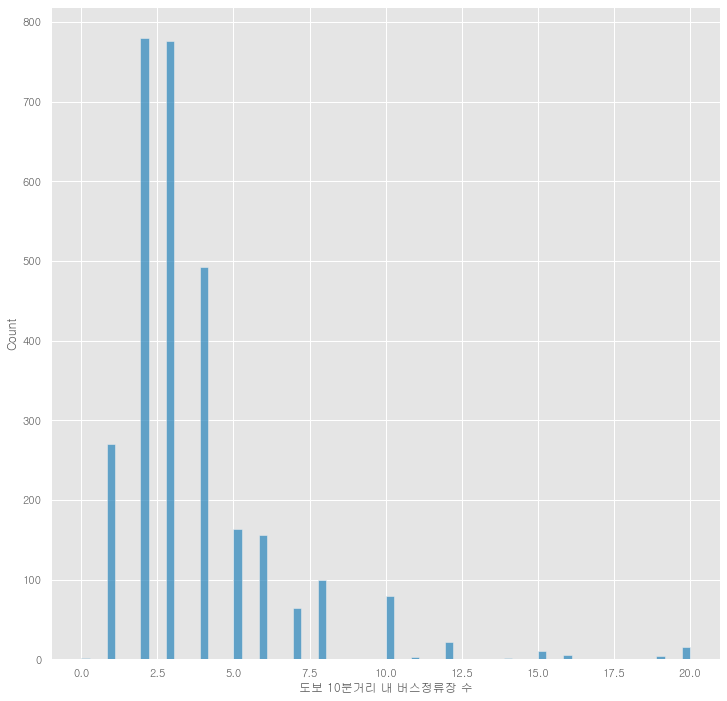

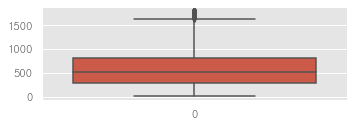

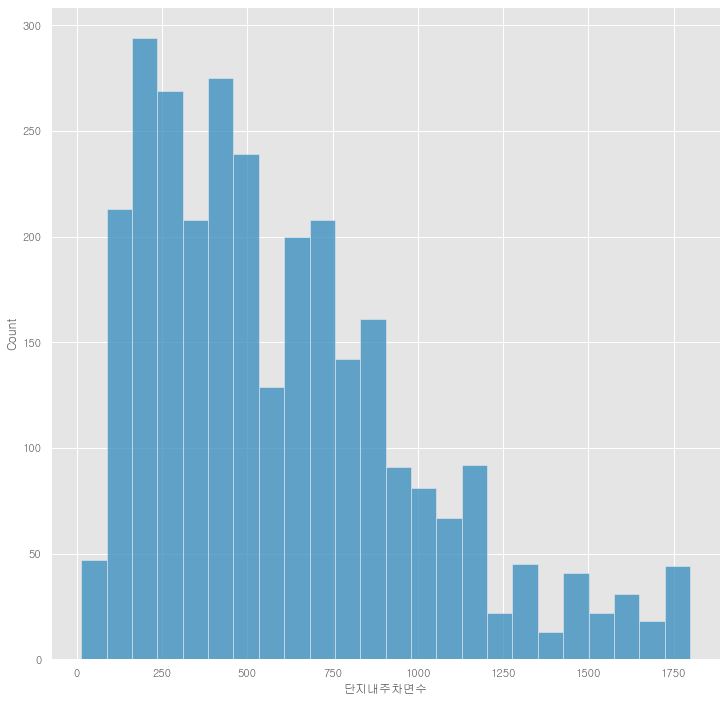

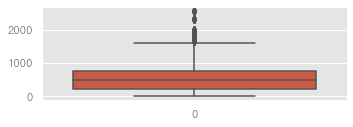

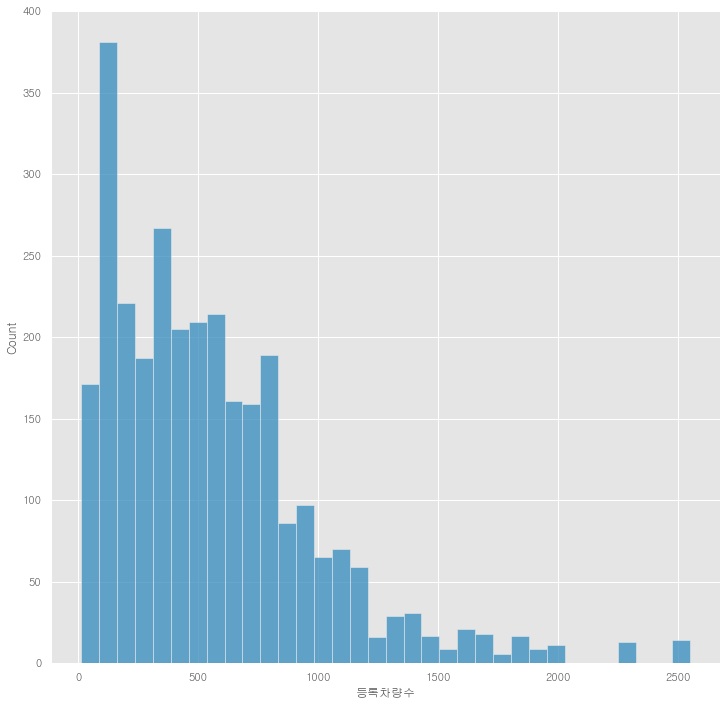

In [15]:

for i,n in enumerate(num_cols):
    plt.subplot(6,2,i+1)
    sns.boxplot(data = train[n])
    plt.show()
    sns.histplot(data = train[n])
    plt.show()

**Q9.전용면적** => 타입으로 변환 가능성...? ex) 39.93 (A타입,B타입)

### 2.1.2 범주형 변수

-단지코드(0), 임대건물구분(2), 지역(3), 공급유형(4), 자격유형(8)

- 설명변수 14개 중 `5개`

### Correlation
 -범주형변수 모두 순위가 없는 명목형이므로 spearman 역시 이용하지 않음

In [16]:
# 단지코드(0) 분포 확인
print(train["단지코드"].value_counts().head())
print(train["단지코드"].value_counts().tail())

C1439    48
C2132    47
C1859    40
C1790    33
C2597    32
Name: 단지코드, dtype: int64
C1497    2
C2188    1
C2437    1
C2520    1
C2340    1
Name: 단지코드, dtype: int64


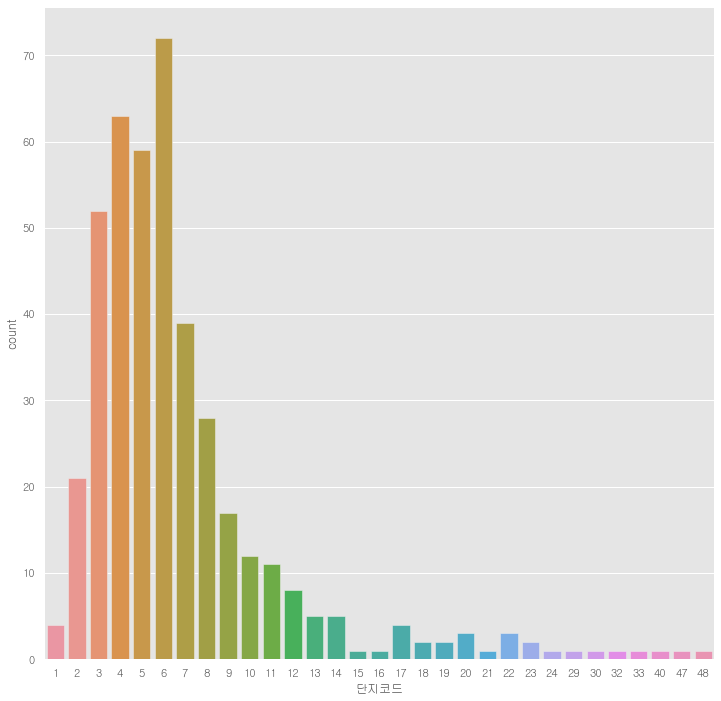

In [17]:
sns.countplot(train["단지코드"].value_counts())
plt.show()

- ***???"단지코드"를 그룹화 해야할까...???***

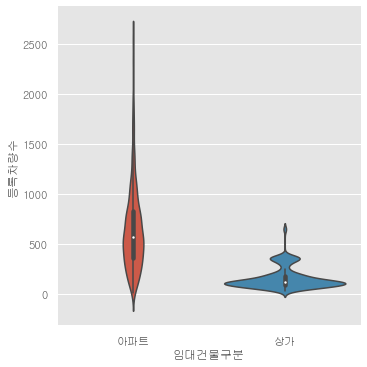

In [18]:
#임대건물구분(2) 분포 확인

sns.catplot(data=train, x='임대건물구분', y='등록차량수',kind='violin')
plt.show()

- 아파트가 눈에 뛰게 등록차량수 많음(make sense)
- 어떤 범위까지는 등록차량수가 적으면 상가, 많으면 아파트 

In [19]:
train["임대건물구분"].value_counts()

아파트    2390
상가      562
Name: 임대건물구분, dtype: int64

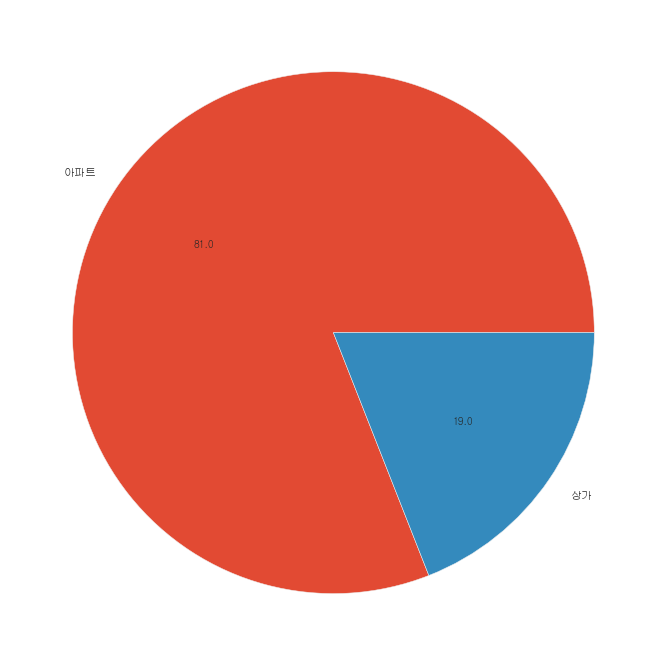

In [20]:
plt.pie(train["임대건물구분"].value_counts(),labels = ["아파트","상가"],autopct = "%.1f")
plt.show()

In [21]:
# 지역(3) 분포 확인
train["지역"].value_counts()

경기도        621
경상남도       369
부산광역시      328
대전광역시      266
강원도        187
충청북도       163
충청남도       158
전라남도       151
광주광역시      141
경상북도       119
전라북도       109
대구광역시      102
제주특별자치도     91
서울특별시       64
세종특별자치시     47
울산광역시       36
Name: 지역, dtype: int64

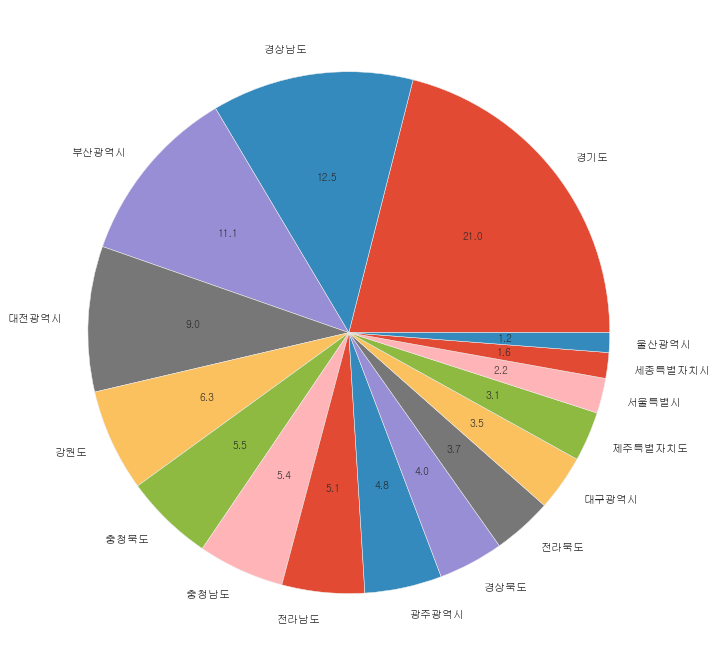

In [22]:
plt.pie(train["지역"].value_counts(),labels = train["지역"].value_counts().index,autopct = "%.1f")
plt.show()

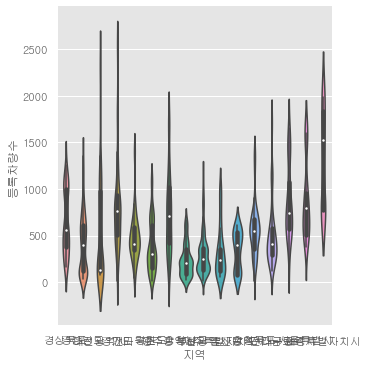

In [23]:
sns.catplot(data=train, x='지역', y='등록차량수',kind='violin')
plt.show()

- 울산,세종,서울 특히 **세종**은 최소등록차량수 수치가 비교적 큼
- 경기도 ,대구 최대등록차량수 수치 비교적 큼
- 울산 최대등록자량수 수치 눈에뛰게 작음
- 경상남도와 경상북도는 분포가 비슷함 -> `경상도` 범주 조정 가능성
- 전남 전북 분포 비교적 비슷하다고 할수 있음 -> `전라도` 범주 조정 가능성
- 충남 충북 분포 다름

- ***???"지역(3)"을 이용해서 age_gender와 결합.???***


국민임대         1758
임대상가          562
행복주택          213
공공임대(10년)     205
영구임대          152
공공임대(50년)      31
공공임대(분납)       12
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

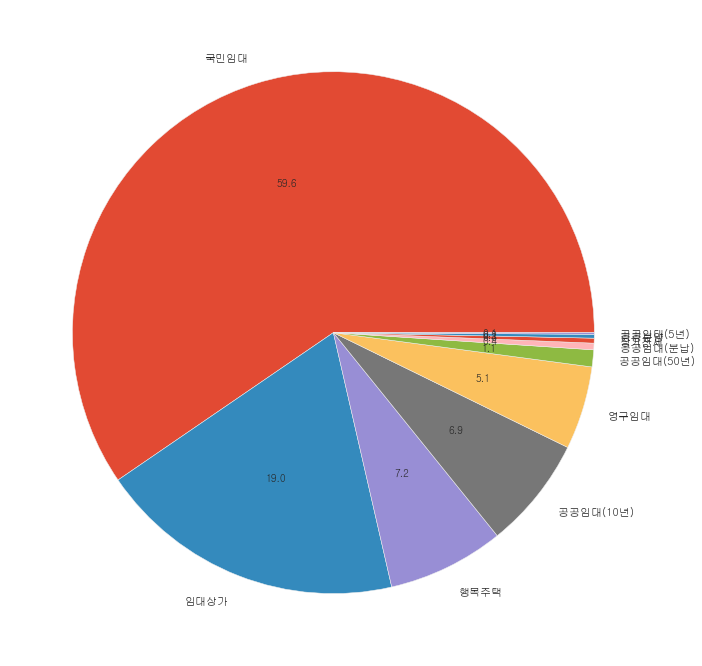

In [24]:
# 공급유형(4) 분포 확인
display(train["공급유형"].value_counts())
plt.pie(train["공급유형"].value_counts(),labels = train["공급유형"].value_counts().index,autopct = "%.1f")
plt.show()

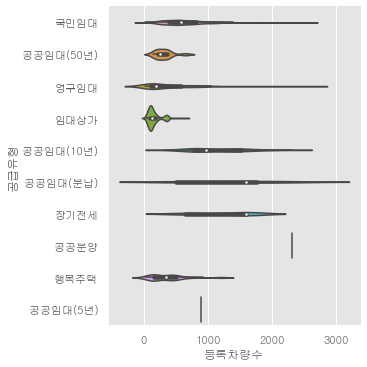

In [25]:
sns.catplot(data=train, y='공급유형', x='등록차량수',kind='violin')
plt.show()

- 2. 공급유형 결합 가능성 => ***공공임대 그룹화??***

A    1801
D     569
H     155
J     114
C      95
I      49
E      37
K      33
L      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

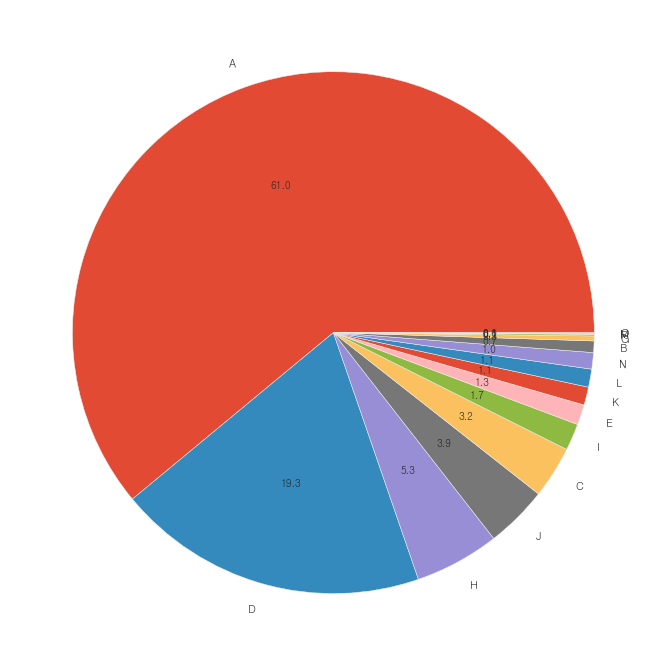

In [26]:
# 자격유형(8) 분포 확인
display(train["자격유형"].value_counts())
plt.pie(train["자격유형"].value_counts(),labels = train["자격유형"].value_counts().index,autopct = "%.1f")
plt.show()

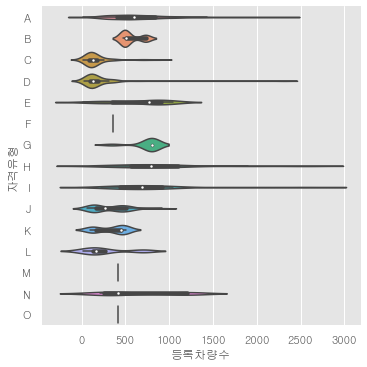

In [27]:
sns.catplot(data=train, y='자격유형', x='등록차량수',kind='violin')
plt.show()

### 2.1.3 추가 

#### 공급유형, 자격유형

In [28]:
train["자격유형"].value_counts()

A    1801
D     569
H     155
J     114
C      95
I      49
E      37
K      33
L      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

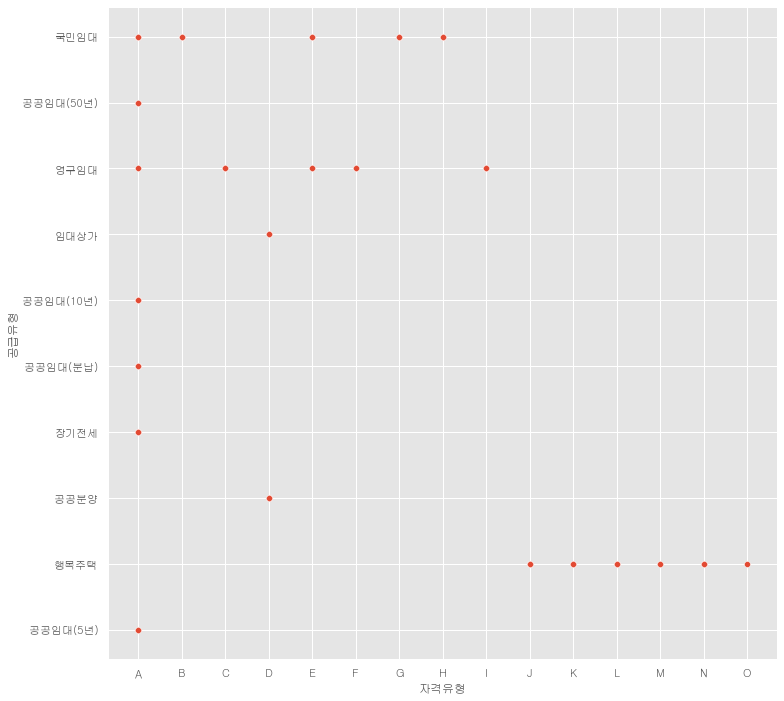

In [29]:
# 자격유형, 공급유형
sns.scatterplot(data = train, x="자격유형", y="공급유형")
plt.show()

- '공공임대'들은 모두 A 자격을 갖춤
- D자격을 갖춘 '공공분양'과 '임대상가'는 모두 임대료 임대보증금이 결측이다.
- 특이값 '-'를 갖고있는 '행복주택'만이  J~O 자격을 갖춤

#### 주차점유율

In [30]:
train["주차점유율"] = train["등록차량수"]/train["단지내주차면수"]
train["주차점유율"].describe()

count    2952.000000
mean        0.923733
std         0.333951
min         0.115854
25%         0.690419
50%         0.931429
75%         1.139806
max         2.458333
Name: 주차점유율, dtype: float64

In [31]:
train[train["주차점유율"] >= 2]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,주차점유율
301,C1722,809,아파트,강원도,공공임대(50년),37.67,89,1.0,A,10043000,189240,0.0,6.0,264.0,649.0,2.458333
302,C1722,809,아파트,강원도,공공임대(50년),49.69,267,1.0,A,13101000,221030,0.0,6.0,264.0,649.0,2.458333
303,C1722,809,아파트,강원도,공공임대(50년),49.69,149,1.0,A,13101000,221030,0.0,6.0,264.0,649.0,2.458333
304,C1722,809,아파트,강원도,영구임대,26.37,149,1.0,C,7744000,125000,0.0,6.0,264.0,649.0,2.458333
305,C1722,809,아파트,강원도,영구임대,31.32,149,1.0,C,8813000,138130,0.0,6.0,264.0,649.0,2.458333
306,C1722,809,상가,강원도,임대상가,32.10,1,1.0,D,NaN,NaN,0.0,6.0,264.0,649.0,2.458333
307,C1722,809,상가,강원도,임대상가,32.10,1,1.0,D,NaN,NaN,0.0,6.0,264.0,649.0,2.458333
308,C1722,809,상가,강원도,임대상가,32.10,1,1.0,D,NaN,NaN,0.0,6.0,264.0,649.0,2.458333
309,C1722,809,상가,강원도,임대상가,32.10,1,1.0,D,NaN,NaN,0.0,6.0,264.0,649.0,2.458333
310,C1722,809,상가,강원도,임대상가,32.10,1,1.0,D,NaN,NaN,0.0,6.0,264.0,649.0,2.458333


주차점유율이 2이상인 값은 이상한데… ->여기서 총세대수가 800인데 단지내주차면수가 264인곳이 존재

#### 거주율
1- (공가수/총세대수)

In [33]:
train["거주율"] = 1 - train["공가수"]/train["총세대수"]
train["거주율"].describe()

count    2952.000000
mean        0.980718
std         0.019477
min         0.825000
25%         0.971751
50%         0.984652
75%         0.994490
max         1.000000
Name: 거주율, dtype: float64

In [37]:
temp = train.loc[:,["거주율","등록차량수"]]
temp.corr()

,거주율,등록차량수
거주율,1.000000,0.182623
등록차량수,0.182623,1.000000


- 거주율과 등록차량수의 상관관계가 크지 않다.

## 2.2 테스트 데이터

우선 데이터가 가진 정보 파악

### 2.2.1 기초 정보 파악

In [38]:
# 데이터 로드
test = pd.read_csv('data/test.csv')
# 데이터 정보 출력
print(test.info())
# 데이터 예시 출력
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
